# Introducción a PyTorch

Hasta el momento hemos implementado nuestros propios algoritmos de `Deep Learning` utilizando `numpy`. Este ejercicio nos ha servido para conocer a detalle los elementos fundamentales de las redes neuronales: el perceptrón y su paso forward, el backpropagation, las funciones de activación y los algoritmos de optimización. Sin embargo, de ahora en adelante, utilizaremos frameworks avanzados para simplificar las operaciones y poder desarrollar redes mucho más complejas. En este notebook, empezamos a aprender a trabajar con uno de los frameworks de `redes neuronales` más utilizados hoy en día: [PyTorch](https://pytorch.org/).

Si estamos trabajando en Google Colab, ya contamos con `PyTorch` instalado por defecto:

In [68]:
import torch
print("Usando Pytorch versión:", torch.__version__)

Usando Pytorch versión: 2.8.0+cu126


Esto significa que estamos usando Pytorch versión 2.8.0 con CUDA versión 12.6

Si queremos trabajar en local, debemos seguir las instrucciones en https://pytorch.org/get-started/locally/.

## ¿Qué es Pytorch?

`Pytorch` es un framework de `redes neuronales`, un conjunto de librerías y herramientas que nos hacen la vida más fácil a la hora de diseñar, entrenar y poner en producción nuestros modelos de `Deep Learning`. Podemos entenderlo como una versión de `numpy`, pero potenciada por operaciones en GPU y con paralelismo real.

Una de las característica más relevante de `Pytorch` es su facilidad de uso. Esto es debido a que sigue una interfaz muy similar a la de `numpy`, y como nosotros ya sabemos trabajar con esa librería, no deberíamos tener muchos problemas para aprender a trabajar con `Pytorch`.

De la misma manera que en `NumPy` el objeto principal es el `ndarray`, en `Pytorch` el objeto principal es el `tensor`. Podemos definir un tensor de manera similar a como definimos un array, incluso podemos inicializar tensores a partir de arrays.

In [69]:
# matriz de ceros, 5 filas y 3 columnas

x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [70]:
# matriz de unos, 4 filas y 6 columnas

x = torch.ones(4, 6)
x

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [71]:
# tensor con valores aleatorios (3 filas, 2 columnas y 5 niveles de profundidad)

x = torch.randn(5, 3, 2)
x

tensor([[[-0.2227,  0.7220],
         [-0.4357,  0.2505],
         [-1.7924, -0.2843]],

        [[ 1.7376, -1.3995],
         [-0.4990,  0.5257],
         [ 0.1727, -0.1173]],

        [[-0.7840,  0.8754],
         [-0.9319, -0.5611],
         [ 0.8475,  0.7770]],

        [[ 0.8995,  1.1674],
         [-0.7204,  0.1639],
         [ 0.9350,  1.1792]],

        [[ 0.5583, -0.1639],
         [-1.6248,  1.3043],
         [ 2.0277, -0.3696]]])

In [72]:
# tensor a partir de lista

x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [73]:
import numpy as np

# tensor a partir de un numpy-array

a = np.array([[1, 2, 3],[4, 5, 6]])
x = torch.from_numpy(a)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

Y como puedes esperar, prácticamente todos los conceptos que ya conocemos para trabajar con `NumPy` pueden aplicarse en `Pytorch`. Esto incluye operaciones aritméticas, indexado y index-slicing, iteración, vectorización y broadcasting.

In [74]:
# operaciones aritméticas

x = torch.randn(3, 3)
y = torch.randn(3, 3)

x, y

(tensor([[ 0.1461, -0.5187,  1.2805],
         [ 0.8817,  1.2258, -0.0346],
         [-0.0286,  1.0303, -0.8185]]),
 tensor([[ 0.0536, -0.5561, -0.2047],
         [-0.5137, -1.1601, -0.2173],
         [ 0.9514,  1.4621,  0.6141]]))

In [75]:
z1 = x + y
z1

tensor([[ 0.1997, -1.0749,  1.0758],
        [ 0.3680,  0.0657, -0.2519],
        [ 0.9229,  2.4924, -0.2045]])

In [76]:
z2 = x - y
z2

tensor([[ 0.0925,  0.0374,  1.4852],
        [ 1.3954,  2.3859,  0.1827],
        [-0.9800, -0.4317, -1.4326]])

In [77]:
# indexado

# primera fila

z2[0]

tensor([0.0925, 0.0374, 1.4852])

In [78]:
# primera fila, primera columna

z2[0, 0]

tensor(0.0925)

In [79]:
# primera columna

z2[:, 0]

tensor([ 0.0925,  1.3954, -0.9800])

In [80]:
# troceado

z2[:-1, 1:]

tensor([[0.0374, 1.4852],
        [2.3859, 0.1827]])

Una funcionalidad importante del objeto `tensor` que utilizaremos muy a menudo es cambiar su forma. Esto lo conseguimos con la función `view`.

In [81]:
x.shape

torch.Size([3, 3])

In [82]:
# añadimos una dimensión extra

x.view(1, 3, 3).shape

torch.Size([1, 3, 3])

In [83]:
x.view(1, 3, 3)

tensor([[[ 0.1461, -0.5187,  1.2805],
         [ 0.8817,  1.2258, -0.0346],
         [-0.0286,  1.0303, -0.8185]]])

In [84]:
# estiramos en una sola dimensión

x.view(9).shape

torch.Size([9])

In [85]:
x.view(9)

tensor([ 0.1461, -0.5187,  1.2805,  0.8817,  1.2258, -0.0346, -0.0286,  1.0303,
        -0.8185])

In [86]:
# usamos -1 para asignar todos los valores restantes a una dimensión

x.view(-1).shape

torch.Size([9])

In [87]:
x.view(-1)

tensor([ 0.1461, -0.5187,  1.2805,  0.8817,  1.2258, -0.0346, -0.0286,  1.0303,
        -0.8185])

Podemos transformar un `tensor` en un `array` con la función `numpy`.

In [88]:
x.numpy()

array([[ 0.14607376, -0.51873827,  1.2805071 ],
       [ 0.88166636,  1.2258135 , -0.03457976],
       [-0.02855779,  1.0303276 , -0.8185241 ]], dtype=float32)

Como podemos ver, un `tensor` de `Pytorch` es muy similar a un `array` de `NumPy`.

## Manjeando gradientes con Pytorch

Ya hemos visto que `Pytorch` es muy similar a `NumPy`, sin embargo su funcionalidad va más allá de una estructura de datos eficiente con la que podemos llevar a cabo operaciones vectoriales (para eso ya nos basta con `NumPy`). La funcionalidad más importante que `Pytorch` añade es la conocidad como `autograd`, la cual nos proporciona la posibilidad de calcular derivadas de manera automática con respecto a cualquier `tensor`. Esto le da a `Pytorch` un gran potencial para diseñar `redes neuronales` complejas y entrenarlas utilizando algoritmos de gradientes sin tener que calcular todas estas derivadas manualmente. Para poder llevar a cabo estas operaciones, `Pytorch` va construyendo de manera dinámica un `grafo computacional`. Cada vez que aplicamos una operación sobre uno o varios tensores, estos se añaden al `grafo computacional` junto a la operación en concreto. De esta manera, si queremos calcular la derivada de cualquier valor con respecto a cualquier tensor, simplemente tenemos que aplicar el algoritmo de `backpropagation` en el `grafo`.

In [89]:
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(8.0, requires_grad=True)
p = x + y

z = torch.tensor(5.0, requires_grad=True)
g = p * z

En la celda anterior hemos definido tres `tensores`: $x$, $y$ y $z$. En primer lugar, para poder calcular derivadas con respecto a estos tensores necesitamos poner su propiedad `requiers_grad` a `True`. Ahora, calculamos el tensor intermedio $p$ como $p = x+ y$ y luego usamos este valor para calcular el resultado final $g$ como $g = p*z$. Cada vez que aplicamos una operación sobre un tensor que tiene su propiedad `requires_grad` a `True`, `Pytorch` irá construyendo el `grafo computacional`. Para este ejemplo, el grafo tendría la siguiente forma

![](https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg)

Si ahora queremos calcular las derivadas de $g$ con respecto a $x$, $y$ y $z$, es tan fácil como llamar a la función `backward`.

In [90]:
g.backward()

En este punto, `Pytorch` ha aplicado el algoritmo de `backpropagation` encima del grafo computacional, calculando todas las derivadas.

$$ \frac{dg}{dz} = p $$

In [91]:
z.grad

tensor(11.)

$$ \frac{dg}{dx} = \frac{dg}{dp} \frac{dp}{dx} = z $$

In [92]:
x.grad

tensor(5.)

$$ \frac{dg}{dy} = \frac{dg}{dp} \frac{dp}{dy} = z $$

In [93]:
y.grad

tensor(5.)

Como puedes ver, el `grafo computacional` es una herramienta extraordinaria para diseñar `redes neuronales` de complejidad arbitraria. Con una simple función, gracias al algoritmo de `backpropagation`, podemos calcular todas las derivadas de manera sencilla (cada nodo que representa una operación solo necesita calcular su propia derivada de manera local) y optimizar el modelo con nuestro algoritmo de gradiente preferido.

Añadiendo `autograd` encima de `NumPy`, `Pytorch` nos ofrece todo lo que necesitamos para diseñar y entrenar `redes neuronales`. Sin embargo, si queremos entrenar redes muy grandes o utilizar datasets muy grandes (o ambas), el proceso de entrenamiento será muy lento. Es aquí donde entra en juego el último elemento que hace de `Pytorch` lo que es.

## GPU

En su mayoría, los modelos llevan a cabo una operación simple: el producto de matrices. Esta operación puede ser muy lenta si estas matrices son muy grandes. Sin embargo, existe hardware especializado en acelerar precisamente este tipo de operaciones: las unidades de procesado gráfico, o GPUs.

<img src="https://www.gsmpro.cl/cdn/shop/articles/Nvidia-GeForce-RTX-5090-rumores.jpg" width="700">

Las GPUs fueron diseñadas con el objetivo de acelerar los cálculos necesarios para renderizar una escena tridimensional en un monitor. Estas escenas se representan mediante polígonos con una posición determinada en el mundo virtual que se desea representar, y en cada fotograma se tiene que calcular su posición relativa a una cámara virtual, el punto de vista de la cual es renderizado en tu pantalla. Si estas escenas tienen muchos polígonos, hacer estos cálculos en la CPU (la unidad de procesado central) pueden llevar mucho tiempo, destruyendo la experiencia en tiempo real que los videojuegos requieren. Es por este motivo que utilizamos GPUs, hardware especializado en llevar a cabo estas operaciones de manera rápida permitiendo las experiencias fluidas a las que estamos acostrumbrados hoy en día.

Da la casualidad que el tipo de operaciones necesarias para calcular la posición de estos triángulos es la misma que necesitamos para entrenar nuestras `redes neuronales`: el producto de (grandes) matrices. El uso de GPUs para acelerar el entrenamiento de modelos de `Deep Learning` ha supuesto una gran revolución en la última década, y es uno de los motivos principales de la explosión que estamos viviendo en el aumento de aplicaciones reales, en las que incluso también ya se incluye su uso en sistemas embebidos.

<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/gtcf20/jetson-nano-products/jetson-nano-commercial-developer-kit-kv-2c50-p@2x.jpg" width="600">

Si trabajas en Google Colab, puedes utilizar una GPU de manera gratuita simplemente cambiando el tipo de `Entorno de ejecución`. Si se desea utilizar una GPU de manera local, tendrás que comprar una dedicada e instalarla en tu PC, o adquirir un laptop que ya venga con una.

`Pytorch` nos permite acelerar las operaciones entre `tensores` de manera muy sencilla. Simplemente tenemos que asegurarnos que nuestros `tensores` viven en una GPU, `Pytorch` se encargará del resto.

In [109]:
# comprobar que podemos usar GPU

import torch
torch.cuda.is_available()

True

In [110]:
x = torch.randn(10000,10000)
y = torch.randn(10000,10000)

%time z = x*y

CPU times: user 66.8 ms, sys: 154 ms, total: 221 ms
Wall time: 221 ms


In [111]:
x = torch.randn(10000,10000).cuda()
y = torch.randn(10000,10000).cuda()

%time z = x*y

CPU times: user 482 µs, sys: 15 ms, total: 15.5 ms
Wall time: 15.5 ms


Como puedes observar, llevar a cabo operaciones con grandes tensores en una GPU en vez de la CPU puede resultar en una considerable reducción del tiempo de cálculo. Todas las siguientes maneras son válidas para copiar un tensor en una GPU

In [97]:
device = torch.device("cpu")

x = torch.randn((10000,10000), device=device)
x = x.cuda()
x = x.to("cuda")
x = x.to(device)

Y para volver a copiar un `tensor` de vuelta en la CPU

In [98]:
device = torch.device("cuda")

x = x.cpu()
x = x.to("cuda")
x = x.to(device)

# Implementando un MLP con Pytorch

# Caso: sistema masa–resorte con fricción cuadrática

Queremos un ejemplo físico sencillo, con dos entradas, que exija un modelo no lineal. Tomaremos una masa unida a un resorte y sometida a fricción aerodinámica aproximada por un término cuadrático en la velocidad. A esto lo llamaremos resorte doble en el sentido de que la fuerza neta tiene dos componentes dominantes: una elástica de retorno y otra de frenado por fricción.

<img src="https://lh3.googleusercontent.com/proxy/l41cexQOCq0waNOIMhbwuoESVp2VNg2Fc8715Ia3wnImNEPCnE0GcaV_E--CHZEf3D1NlKRL1ST1S8GAWQEM04fGO4h3XzO59IzI2DabIV9woVn5SziqktS2" width="550">

## Planteamiento físico

- Variable de estado 1: posición respecto al equilibrio, $x$ [m].  
- Variable de estado 2: velocidad, $v$ [m/s].  
- Fuerza neta sobre la masa:
$$
F(x, v) = -k\,x - c\,v\,|v|
$$
donde $k>0$ es la constante del resorte y $c>0$ es el coeficiente de fricción cuadrática.  
El término $v\,|v|$ hace que la fricción siempre se oponga al movimiento y crezca con el cuadrado de la velocidad.


## Alcance y supuestos

- Se asume un movimiento en una dimensión con masa constante.  
- No se incluyen fuerzas adicionales como empujes externos ni elasticidad no lineal del resorte.  
- Se añadirá ruido simulando una medición de datos experimentales.

## Tarea con red neuronal

- Entradas del modelo: $[x, v]$.  
- Salida: $F$.  
- Métrica de evaluación sugerida: RMSE y $R^2$.  
- Baseline: regresión lineal múltiple.  
- Modelo no lineal: MLP con activaciones no lineales que capture la curvatura impuesta por el término cuadrático de fricción.  

Con este setup se obtiene un problema físico claro, con dos entradas y una relación entrada–salida inherentemente no lineal, ideal para demostrar la ventaja de una red neuronal frente a un ajuste lineal.


## Diseño y entrenamiento del modelo paso a paso

In [99]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 0) Semilla y dispositivo
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) Parámetros físicos y tamaño de datos
k, c = 50.0, 0.8
n = 5000

# 2) Generación de datos sintéticos
x = torch.empty(n).uniform_(-0.3, 0.3)
v = torch.empty(n).uniform_(-8.0, 8.0)
X = torch.stack([x, v], dim=1)                              # shape (n, 2)
y = (-k * x - c * v * v.abs() + torch.randn(n) * 2.0).view(-1, 1)  # shape (n, 1)

# 3) División train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4) Envío a dispositivo GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# 5) Activación ReLU definida manualmente
def relu(z):
    return torch.clamp(z, min=0.0)

# 6) Arquitectura 2-32-16-1 con parámetros libres
D_in, H1, H2, D_out = 2, 32, 16, 1

# Definimos los valores iniciales de los parámetros (pesos y bias)
W1 = torch.randn(D_in, H1, device=device)
b1 = torch.zeros(1, H1, device=device)
W2 = torch.randn(H1, H2, device=device)
b2 = torch.zeros(1, H2, device=device)
W3 = torch.randn(H2, D_out, device=device)
b3 = torch.zeros(1, D_out, device=device)

params = [W1, b1, W2, b2, W3, b3]
for p in params:
    p.requires_grad_(True)

# 7) Hiperparámetros de Adam mini-batch
lr = 1e-2
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
batch = 256
epocas = 200

# 8) Estados de Adam para cada parámetro
m = [torch.zeros_like(p) for p in params]   # primeras momentos
v = [torch.zeros_like(p) for p in params]   # segundos momentos

# 9) Entrenamiento con Adam mini-batch
t_global = 0  # contador de pasos para corrección de sesgo

for epoch in range(epocas):
    # muestreo de un mini-batch
    idx = torch.randint(0, X_train.shape[0], (batch,), device=device)
    Xb = X_train[idx]
    yb = y_train[idx]

    # 9.1) Forward pass
    z1 = Xb @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    yhat = a2 @ W3 + b3

    # 9.2) Costo RMSE
    loss = torch.sqrt(torch.mean((yhat - yb) ** 2))

    # 9.3) Poner gradientes en cero
    for p in params:
        if p.grad is not None:
            p.grad.zero_()

    # 9.4) Backprop con autograd
    loss.backward()

    # 9.5) Paso de Adam manual (actualización de parámetros)
    t_global += 1
    with torch.no_grad():
        for i, p in enumerate(params):
            # estimaciones de momentos
            m[i] = beta1 * m[i] + (1 - beta1) * p.grad
            v[i] = beta2 * v[i] + (1 - beta2) * (p.grad * p.grad)

            # corrección de sesgo
            m_hat = m[i] / (1 - beta1 ** t_global)
            v_hat = v[i] / (1 - beta2 ** t_global)

            # actualización Adam
            p -= lr * m_hat / (torch.sqrt(v_hat) + eps)

# 10) Evaluación en test
with torch.no_grad():
    z1 = X_test @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    yhat = a2 @ W3 + b3

    rmse = torch.sqrt(torch.mean((yhat - y_test) ** 2))
    ss_res = torch.sum((y_test - yhat) ** 2).item()
    ss_tot = torch.sum((y_test - y_test.mean()) ** 2).item()
    r2 = 1.0 - ss_res / ss_tot

print(f"PyTorch Adam mini-batch  RMSE={rmse:.4f}  R2={r2:.4f}  device={device}")


PyTorch Adam mini-batch  RMSE=2.2345  R2=0.9915  device=cuda


## Comparativa con un modelo lineal

Regresión lineal  RMSE=33.8782  R2=0.9342  device=CPU


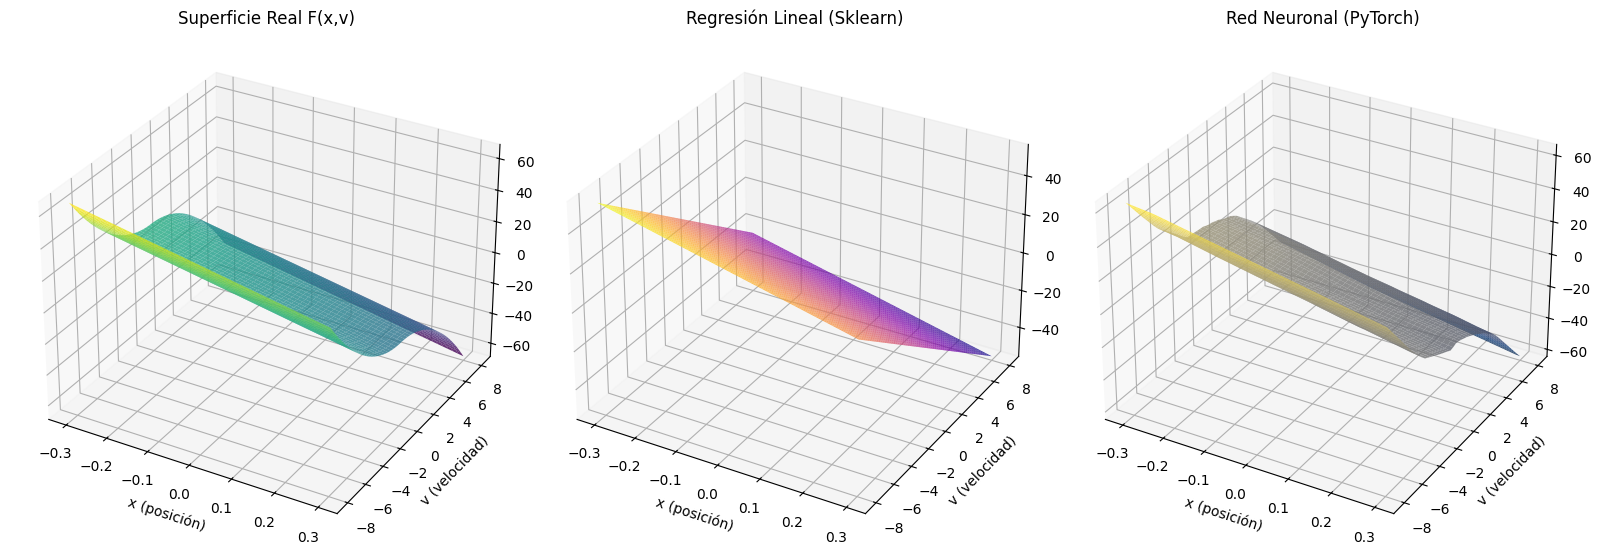

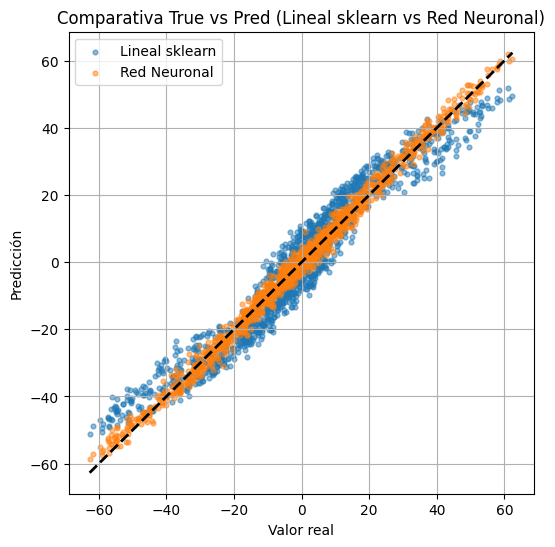

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# === Entrenamos un modelo lineal con sklearn ===
X_np = X_train.cpu().numpy()
y_np = y_train.cpu().numpy().ravel()

lin = LinearRegression()
lin.fit(X_np, y_np)

# === Predecimos con ambos modelos ===
with torch.no_grad():
    y_pred_nn = (relu(relu(X_test @ W1 + b1) @ W2 + b2) @ W3 + b3).cpu().numpy().ravel()
y_pred_lin = lin.predict(X_test.cpu().numpy()).ravel()

# === Generamos superficie 3D ===
xg = np.linspace(X_test[:,0].min().cpu(), X_test[:,0].max().cpu(), 50)
vg = np.linspace(X_test[:,1].min().cpu(), X_test[:,1].max().cpu(), 50)
Xg, Vg = np.meshgrid(xg, vg)
Fg_true = -k * Xg - c * Vg * np.abs(Vg)
Fg_lin = lin.predict(np.column_stack([Xg.ravel(), Vg.ravel()])).reshape(Xg.shape)

rmse = (np.mean((y_pred_lin - y_test.cpu().numpy()) ** 2))**0.5
r2 = r2_score(y_test.cpu(), y_pred_lin)

print(f"Regresión lineal  RMSE={rmse:.4f}  R2={r2:.4f}  device=CPU")

with torch.no_grad():
    Fg_nn = (relu(relu(torch.tensor(np.column_stack([Xg.ravel(), Vg.ravel()]), dtype=torch.float32, device=device) @ W1 + b1) @ W2 + b2) @ W3 + b3).cpu().numpy().reshape(Xg.shape)

# === Gráficos 3D ===
fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(Xg, Vg, Fg_true, cmap='viridis', alpha=0.8)
ax1.set_title("Superficie Real F(x,v)")
ax1.set_xlabel("x (posición)")
ax1.set_ylabel("v (velocidad)")
ax1.set_zlabel("Fuerza")

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(Xg, Vg, Fg_lin, cmap='plasma', alpha=0.8)
ax2.set_title("Regresión Lineal (Sklearn)")
ax2.set_xlabel("x (posición)")
ax2.set_ylabel("v (velocidad)")
ax2.set_zlabel("Fuerza")

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(Xg, Vg, Fg_nn, cmap='cividis', alpha=0.8)
ax3.set_title("Red Neuronal (PyTorch)")
ax3.set_xlabel("x (posición)")
ax3.set_ylabel("v (velocidad)")
ax3.set_zlabel("Fuerza")

plt.tight_layout()
plt.show()

# === Gráfico True vs Pred ===
plt.figure(figsize=(6,6))
plt.scatter(y_test.cpu().numpy(), y_pred_lin, alpha=0.5, label='Lineal sklearn', s=12)
plt.scatter(y_test.cpu().numpy(), y_pred_nn, alpha=0.5, label='Red Neuronal', s=12)
plt.plot([y_test.min().cpu(), y_test.max().cpu()], [y_test.min().cpu(), y_test.max().cpu()], 'k--', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Comparativa True vs Pred (Lineal sklearn vs Red Neuronal)")
plt.legend()
plt.grid(True)
plt.show()


Como puedes observar, simplemente definiendo los `tensores` para los pesos y los datos y copiándolos a la GPU podemos definir el `grafo computacional` de manera dinámica aplicando operaciones sobre los tensores (multiplicamos por los pesos y sumamos el *bias*). Una vez tenemos la salida del `MLP` calculamos la función de pérdida y llamando a la función `backward`.`Pytorch` se encarga de calcular todas las derivadas de manera automática. Una vez tenemos los gradientes con respecto a los pesos, podemos actualizarlos.

## Desarrollo del modelo en alto nivel

Ahora que ya conocemos cómo diseñar y entrenar una red desde cero y paso a paso, para ahorrar tiempo y no extender tanto el código, desde ahora usaremos las funciones y clases del módulo torch.nn, el cual nos permite desarrollar el modelo con clases en alto nivel y ya no a nivel de tensor.

Adam mini-batch usando torch.nn  RMSE=2.0947  R2=0.9926  device=cuda


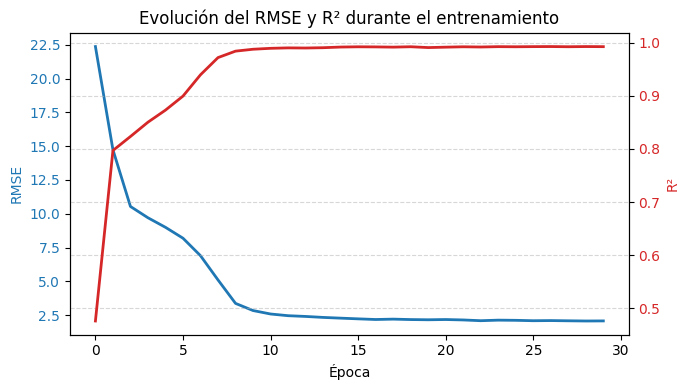

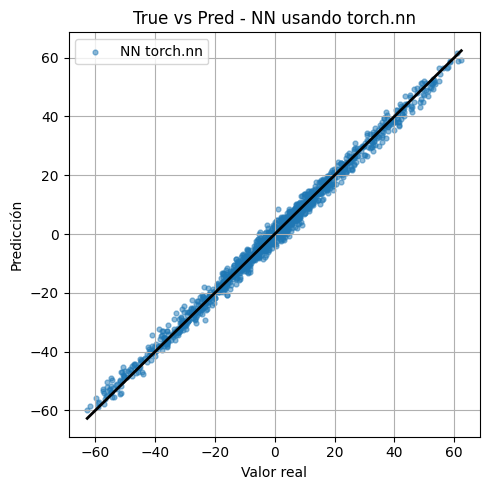

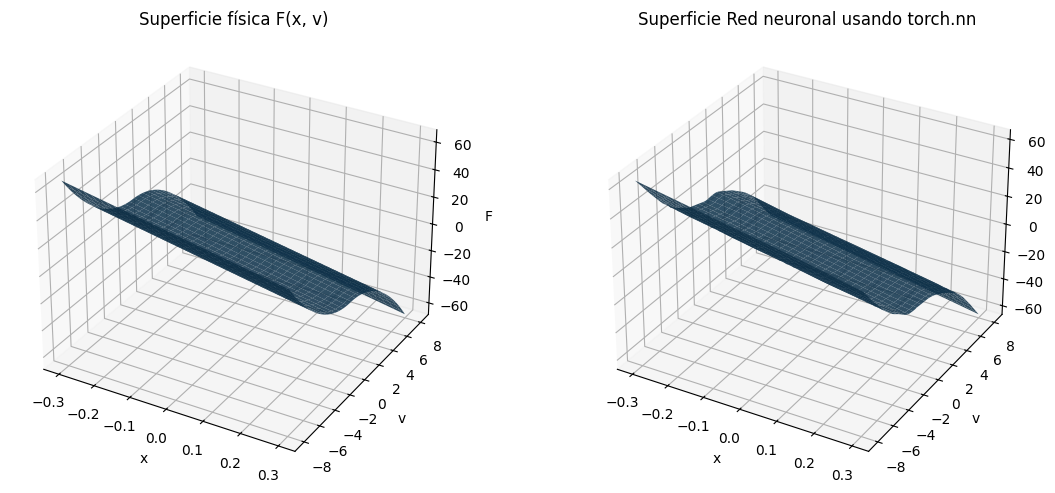

In [101]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# =======================
# Configuración inicial
# =======================
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

k, c = 50.0, 0.8
n = 5000

# =======================
# Generación de datos
# =======================
x = torch.empty(n).uniform_(-0.3, 0.3)
v = torch.empty(n).uniform_(-8.0, 8.0)
X = torch.stack([x, v], dim=1)
y = (-k * x - c * v * v.abs() + torch.randn(n) * 2.0).view(-1, 1)

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# =======================
# Definición del modelo
# =======================
model = nn.Sequential(
    nn.Linear(2, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
).to(device)

lr = 1e-2
batch_size = 256
epochs = 30

ds = TensorDataset(X_train, y_train)
dl = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=False)

opt = torch.optim.Adam(model.parameters(), lr=lr)
mse_loss = nn.MSELoss()

# =======================
# Entrenamiento
# =======================
loss_hist = []
r2_hist = []

model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for xb, yb in dl:
        yhat = model(xb)
        loss = torch.sqrt(mse_loss(yhat, yb))  # RMSE

        opt.zero_grad(set_to_none=True)
        loss.backward()
        opt.step()
        epoch_loss += loss.item()

    # Promedio de pérdidas por época
    epoch_loss /= len(dl)
    loss_hist.append(epoch_loss)

    # Evaluación de R² por época
    model.eval()
    with torch.no_grad():
        yhat_test = model(X_test)
        y_true_np = y_test.view(-1).cpu().numpy()
        y_pred_np = yhat_test.view(-1).cpu().numpy()
        r2 = r2_score(y_true_np, y_pred_np)
        r2_hist.append(r2)
    model.train()

# =======================
# Evaluación final
# =======================
model.eval()
with torch.no_grad():
    yhat = model(X_test)
    mse = mse_loss(yhat, y_test).item()
    rmse = mse ** 0.5
    y_true_np = y_test.view(-1).cpu().numpy()
    y_pred_np = yhat.view(-1).cpu().numpy()
    r2 = r2_score(y_true_np, y_pred_np)

print(f"Adam mini-batch usando torch.nn  RMSE={rmse:.4f}  R2={r2:.4f}  device={device}")

# =======================
# Gráficas
# =======================

# 1. Gráfica de Loss y R² por época
fig, ax1 = plt.subplots(figsize=(7,4))
ax1.plot(loss_hist, color='tab:blue', label='RMSE', linewidth=2)
ax1.set_xlabel("Época")
ax1.set_ylabel("RMSE", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(r2_hist, color='tab:red', label='R²', linewidth=2)
ax2.set_ylabel("R²", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title("Evolución del RMSE y R² durante el entrenamiento")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Gráfica True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(y_true_np, y_pred_np, s=12, alpha=0.5, label="NN torch.nn")
m = float(min(y_true_np.min(), y_pred_np.min()))
M = float(max(y_true_np.max(), y_pred_np.max()))
plt.plot([m, M], [m, M], linewidth=2, color="black")
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("True vs Pred - NN usando torch.nn")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Superficie 3D (Física vs NN)
xg = np.linspace(X_test[:,0].min().item(), X_test[:,0].max().item(), 60)
vg = np.linspace(X_test[:,1].min().item(), X_test[:,1].max().item(), 60)
Xg, Vg = np.meshgrid(xg, vg)
grid_np = np.column_stack([Xg.ravel(), Vg.ravel()])
with torch.no_grad():
    grid_t = torch.tensor(grid_np, dtype=torch.float32, device=device)
    Fg_nn = model(grid_t).view(-1).cpu().numpy()
Fg_true = (-k * Xg - c * Vg * np.abs(Vg)).ravel()

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1, projection="3d")
ax1.plot_surface(Xg, Vg, Fg_true.reshape(Xg.shape), alpha=0.85)
ax1.set_title("Superficie física F(x, v)")
ax1.set_xlabel("x")
ax1.set_ylabel("v")
ax1.set_zlabel("F")

ax2 = fig.add_subplot(1,2,2, projection="3d")
ax2.plot_surface(Xg, Vg, Fg_nn.reshape(Xg.shape), alpha=0.85)
ax2.set_title("Superficie Red neuronal usando torch.nn")
ax2.set_xlabel("x")
ax2.set_ylabel("v")
ax2.set_zlabel("F")

plt.tight_layout()
plt.show()


# CASO: MNIST

MNIST es un conjunto de datos clásico en visión por computadora y aprendizaje automático. Contiene 70 mil imágenes en escala de grises de dígitos escritos a mano, cada una de 28x28 píxeles. Se usa como punto de partida para entrenar y evaluar modelos que reconocen números del 0 al 9.

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 345kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.29MB/s]


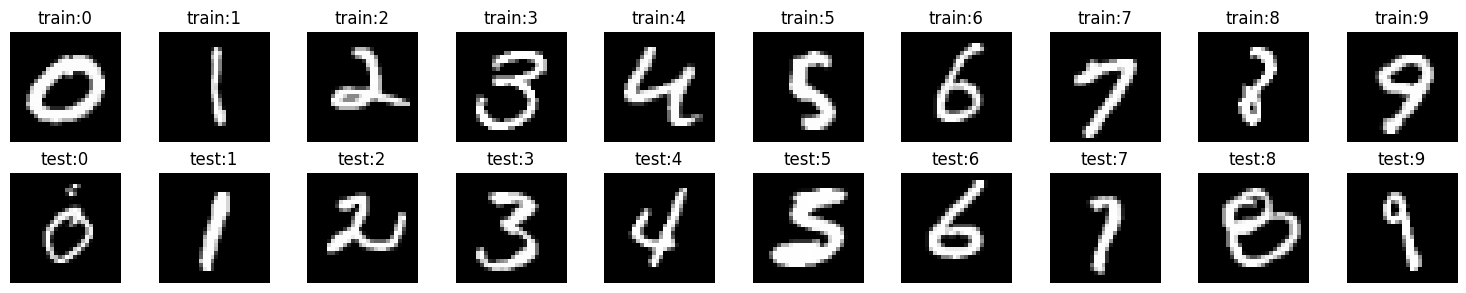

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.ToTensor()

train_set = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_set = datasets.MNIST(root="data", train=False, download=True, transform=transform)

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

classes = list(range(10))
g = torch.Generator().manual_seed(123)

fig, axes = plt.subplots(2, 10, figsize=(15,3))
for row, ds in enumerate([train_set, test_set]):
    targets = ds.targets
    for c in classes:
        idxs = torch.nonzero(targets==c, as_tuple=False).view(-1)
        ix = idxs[torch.randint(0, idxs.shape[0], (1,), generator=g)].item()
        img, lab = ds[ix]
        axes[row, c].imshow(img.squeeze(0), cmap="gray")
        axes[row, c].set_title(f"{'train' if row==0 else 'test'}:{lab}")
        axes[row, c].axis("off")
plt.tight_layout()
plt.show()


In [103]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),  # Se convierte la matriz 2D que representa a la imagen en un vector de una sola dimensión
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
).to(device)


In [104]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

epochs = 10
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

# Historiales para monitorear la evolución por época
train_loss_hist = []      # Pérdida promedio en train por época
test_loss_hist  = []      # Pérdida promedio en test por época
acc_hist_train  = []      # Accuracy en train por época
acc_hist_test   = []      # Accuracy en test por época
f1_hist_train   = []      # F1 macro en train por época
f1_hist_test    = []      # F1 macro en test por época

for ep in range(epochs):
    # Modo entrenamiento:
    model.train()
    running_loss = 0.0     # Acumulador de pérdida en train para promediar al final
    num_batches  = 0

    # Bucle de mini batches sobre el loader de entrenamiento
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)     # Mover batch a CPU o GPU
        logits = model(xb)                        # Forward
        loss = F.cross_entropy(logits, yb)        # Cálculo de pérdida de clasificación

        opt.zero_grad(set_to_none=True)           # Limpia gradientes acumulados
        loss.backward()                           # Backprop
        opt.step()                                # Actualización de pesos con Adam

        running_loss += loss.item()               # Suma de pérdidas para promediar
        num_batches  += 1

    # Promedio de pérdida de entrenamiento para la época actual
    epoch_train_loss = running_loss / max(1, num_batches)
    train_loss_hist.append(epoch_train_loss)

    # Evaluación de métricas en TRAIN para registrar curvas comparables
    model.eval()
    with torch.no_grad():
        preds_train = []
        trues_train = []
        running_loss_te = 0.0
        num_batches_te  = 0

        # Para medir loss en test y métricas en train y test, recorremos ambos dataloaders
        # 1) Métricas en TRAIN
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            pred = logits.argmax(dim=1)
            preds_train.append(pred.cpu())
            trues_train.append(yb.cpu())

        y_pred_tr = torch.cat(preds_train).numpy()
        y_true_tr = torch.cat(trues_train).numpy()
        acc_tr = accuracy_score(y_true_tr, y_pred_tr)                 # Accuracy train
        f1_tr  = f1_score(y_true_tr, y_pred_tr, average="macro")      # F1 macro train
        acc_hist_train.append(acc_tr)
        f1_hist_train.append(f1_tr)

        # 2) Pérdida y métricas en TEST
        preds_test = []
        trues_test = []
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss_te = F.cross_entropy(logits, yb)                      # Loss por batch en test
            running_loss_te += loss_te.item()
            num_batches_te  += 1
            pred = logits.argmax(dim=1)
            preds_test.append(pred.cpu())
            trues_test.append(yb.cpu())

        epoch_test_loss = running_loss_te / max(1, num_batches_te)     # Loss promedio test
        test_loss_hist.append(epoch_test_loss)

        y_pred_te = torch.cat(preds_test).numpy()
        y_true_te = torch.cat(trues_test).numpy()
        acc_te = accuracy_score(y_true_te, y_pred_te)                  # Accuracy test
        f1_te  = f1_score(y_true_te, y_pred_te, average="macro")       # F1 macro test
        acc_hist_test.append(acc_te)
        f1_hist_test.append(f1_te)

    # Impresión de métricas por época para trazabilidad en consola
    print(f"Epoca {ep+1:03d} | "
          f"Train Loss: {epoch_train_loss:.4f}  Acc: {acc_tr:.4f}  F1_macro: {f1_tr:.4f}  ||  "
          f"Test Loss: {epoch_test_loss:.4f}   Acc: {acc_te:.4f}  F1_macro: {f1_te:.4f}")



Epoca 001 | Train Loss: 0.5624  Acc: 0.9251  F1_macro: 0.9240  ||  Test Loss: 0.2596   Acc: 0.9248  F1_macro: 0.9235
Epoca 002 | Train Loss: 0.2297  Acc: 0.9474  F1_macro: 0.9469  ||  Test Loss: 0.1874   Acc: 0.9439  F1_macro: 0.9431
Epoca 003 | Train Loss: 0.1696  Acc: 0.9606  F1_macro: 0.9602  ||  Test Loss: 0.1427   Acc: 0.9575  F1_macro: 0.9571
Epoca 004 | Train Loss: 0.1308  Acc: 0.9669  F1_macro: 0.9666  ||  Test Loss: 0.1243   Acc: 0.9622  F1_macro: 0.9619
Epoca 005 | Train Loss: 0.1072  Acc: 0.9734  F1_macro: 0.9732  ||  Test Loss: 0.1049   Acc: 0.9670  F1_macro: 0.9667
Epoca 006 | Train Loss: 0.0900  Acc: 0.9784  F1_macro: 0.9783  ||  Test Loss: 0.0958   Acc: 0.9717  F1_macro: 0.9715
Epoca 007 | Train Loss: 0.0744  Acc: 0.9815  F1_macro: 0.9815  ||  Test Loss: 0.0886   Acc: 0.9719  F1_macro: 0.9717
Epoca 008 | Train Loss: 0.0634  Acc: 0.9839  F1_macro: 0.9838  ||  Test Loss: 0.0819   Acc: 0.9735  F1_macro: 0.9733
Epoca 009 | Train Loss: 0.0536  Acc: 0.9870  F1_macro: 0.9869  |

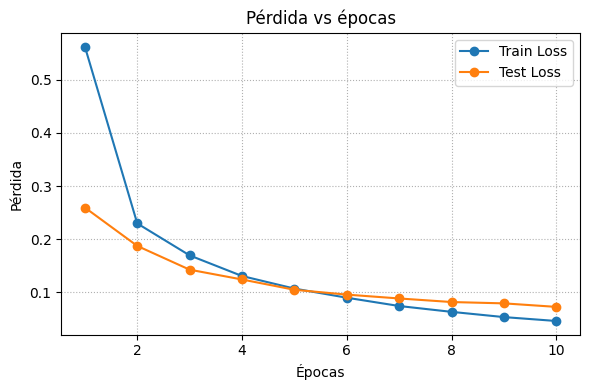

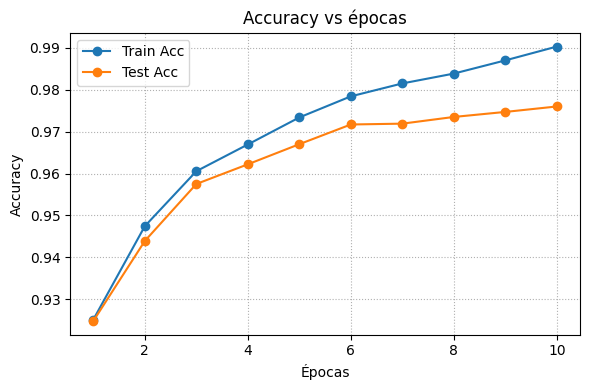

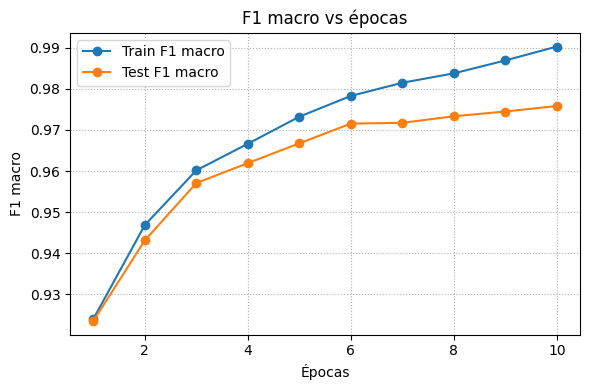

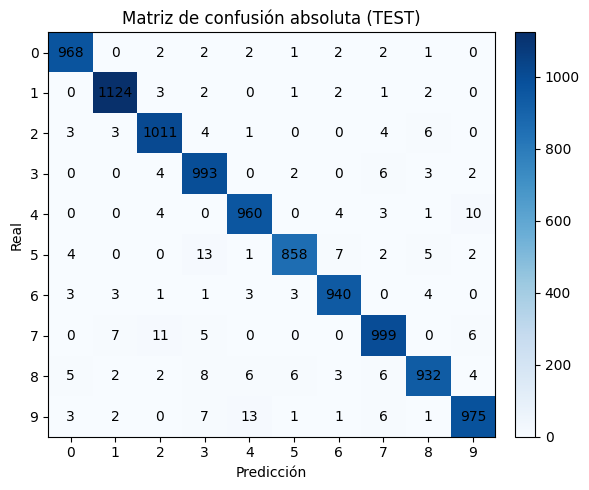

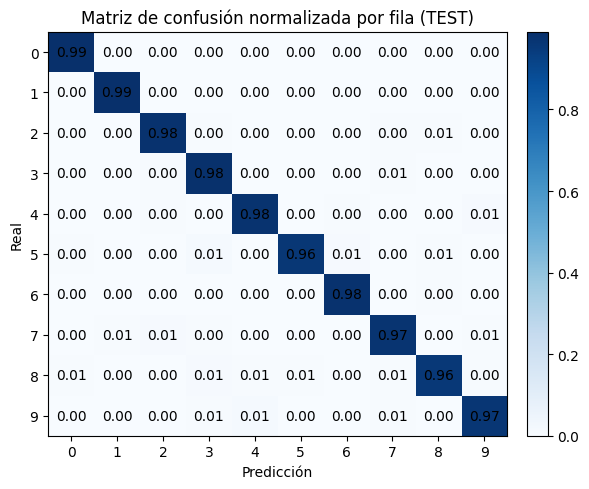

In [105]:
# ================================
# Gráficas y matrices de confusión
# ================================

# Rango de épocas para el eje x
ep_range = np.arange(1, epochs + 1)

# 1) Curvas de pérdida por época
plt.figure(figsize=(6,4))
plt.plot(ep_range, train_loss_hist, marker="o", label="Train Loss")
plt.plot(ep_range, test_loss_hist, marker="o", label="Test Loss")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida vs épocas")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

# 2) Curvas de accuracy por época
plt.figure(figsize=(6,4))
plt.plot(ep_range, acc_hist_train, marker="o", label="Train Acc")
plt.plot(ep_range, acc_hist_test, marker="o", label="Test Acc")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.title("Accuracy vs épocas")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Curvas de F1 macro por época
plt.figure(figsize=(6,4))
plt.plot(ep_range, f1_hist_train, marker="o", label="Train F1 macro")
plt.plot(ep_range, f1_hist_test, marker="o", label="Test F1 macro")
plt.xlabel("Épocas")
plt.ylabel("F1 macro")
plt.title("F1 macro vs épocas")
plt.grid(True, linestyle=":")
plt.legend()
plt.tight_layout()
plt.show()

# 4) Matrices de confusión en TEST: absoluta y normalizada por fila
model.eval()
with torch.no_grad():
    preds_test = []
    trues_test = []
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        pred = logits.argmax(dim=1)
        preds_test.append(pred.cpu())
        trues_test.append(yb.cpu())
y_pred_te = torch.cat(preds_test).numpy()
y_true_te = torch.cat(trues_test).numpy()

# Etiquetas de clase para el eje
classes = np.unique(np.concatenate([y_true_te, y_pred_te]))
tick_labels = [str(c) for c in classes]

# Función auxiliar para pintar la matriz con anotaciones visibles
def plot_cm(cm, title, fmt_vals, cmap="Blues"):
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(cm, cmap=cmap, aspect="auto")
    ax.set_title(title)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(tick_labels, rotation=0)
    ax.set_yticklabels(tick_labels)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, fmt_vals(i, j), ha="center", va="center")
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

# Matriz absoluta
cm_abs = confusion_matrix(y_true_te, y_pred_te, labels=classes)
plot_cm(
    cm_abs,
    title="Matriz de confusión absoluta (TEST)",
    fmt_vals=lambda i, j: f"{cm_abs[i, j]:d}"
)

# Matriz normalizada por fila
cm_norm = confusion_matrix(y_true_te, y_pred_te, labels=classes, normalize="true")
plot_cm(
    cm_norm,
    title="Matriz de confusión normalizada por fila (TEST)",
    fmt_vals=lambda i, j: f"{cm_norm[i, j]:.2f}"
)


In [121]:
from google.colab import output
import torch, torch.nn.functional as F
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

def mnist_predict(pixels):
    x = np.array(pixels, dtype=np.float32).reshape(1, 1, 28, 28)
    t = torch.from_numpy(x).to(device)
    with torch.no_grad():
        logits = model(t)
        probs = F.softmax(logits, dim=1).squeeze().tolist()
        pred = int(np.argmax(probs))
    return {'pred': pred, 'probs': probs}

output.register_callback('mnist_predict', mnist_predict)
print("Callback mnist_predict registrado.")


Callback mnist_predict registrado.


In [122]:
from IPython.display import HTML, display

display(HTML("""
<div id="mnist-ui" style="font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, Arial; max-width: 960px; margin: 10px auto;">
  <div style="display: grid; grid-template-columns: 360px 1fr; gap: 16px; align-items: start;">
    <div>
      <div style="display:flex; align-items:center; gap:10px; margin:6px 0 10px;">
        <label for="stroke" style="font-size:14px;">Grosor:</label>
        <input id="stroke" type="range" min="4" max="48" step="1" value="18" style="width:170px;">
        <button id="clearBtn" style="padding:8px 12px; border:1px solid #ddd; border-radius:10px; background:#fff; cursor:pointer;">Limpiar</button>
        <button id="predictBtn" style="padding:8px 12px; border:1px solid #222; border-radius:10px; background:#111; color:#fff; cursor:pointer;">Predecir</button>
      </div>
      <div style="position:relative; width:340px; height:340px;">
        <canvas id="board" width="340" height="340" style="width:340px; height:340px; background:#fff; border:1px solid #e5e5e5; border-radius:12px; box-shadow:0 1px 3px rgba(0,0,0,.05); touch-action:none; cursor: crosshair;"></canvas>
      </div>
    </div>
    <div style="display:flex; flex-direction:column; gap:8px;">
      <div style="font-size:14px; opacity:.8;">Predicción</div>
      <div id="pred" style="font-size:96px; font-weight:700; line-height:1; padding:20px 24px; border:1px solid #eee; border-radius:12px; min-height:120px; display:flex; align-items:center; justify-content:center; background:#fafafa;">-</div>
      <div style="font-size:14px; opacity:.8;">Probabilidades</div>
      <pre id="probs" style="border:1px solid #eee; border-radius:12px; padding:12px; background:#fff; font-family:ui-monospace, SFMono-Regular, Menlo, Monaco, Consolas, 'Liberation Mono', 'Courier New', monospace; overflow:auto; max-height:200px; margin:0;"></pre>
      <div id="err" style="color:#b00020; font-size:13px;"></div>
    </div>
  </div>
</div>

<script>
(function(){
  const board = document.getElementById('board');
  const ctx = board.getContext('2d');
  const stroke = document.getElementById('stroke');
  const clearBtn = document.getElementById('clearBtn');
  const predictBtn = document.getElementById('predictBtn');
  const predBox = document.getElementById('pred');
  const probsBox = document.getElementById('probs');
  const errBox = document.getElementById('err');

  let drawing = false;
  let last = null;

  function setStroke() {
    ctx.lineWidth = parseInt(stroke.value, 10);
    ctx.lineCap = 'round';
    ctx.lineJoin = 'round';
    ctx.strokeStyle = '#000000';
  }

  function getPos(e){
    const rect = board.getBoundingClientRect();
    const p = e.touches ? e.touches[0] : e;
    const x = p.clientX - rect.left;
    const y = p.clientY - rect.top;
    return {x, y};
  }

  function start(e){
    e.preventDefault();
    drawing = true;
    last = getPos(e);
  }

  function move(e){
    if(!drawing) return;
    const pos = getPos(e);
    ctx.beginPath();
    ctx.moveTo(last.x, last.y);
    ctx.lineTo(pos.x, pos.y);
    ctx.stroke();
    last = pos;
  }

  function end(){
    drawing = false;
  }

  function clearCanvas(){
    ctx.clearRect(0,0,board.width, board.height);
    predBox.textContent = '-';
    probsBox.textContent = '';
    errBox.textContent = '';
  }

  function toMNIST28x28NegativeFloatArray(){
    const temp = document.createElement('canvas');
    temp.width = 28;
    temp.height = 28;
    const tctx = temp.getContext('2d');
    tctx.fillStyle = '#ffffff';
    tctx.fillRect(0,0,28,28);
    tctx.imageSmoothingEnabled = true;
    tctx.imageSmoothingQuality = 'high';
    tctx.drawImage(board, 0, 0, 28, 28);
    const img = tctx.getImageData(0,0,28,28);
    const out = new Float32Array(28*28);
    for(let i=0;i<img.data.length;i+=4){
      const r = img.data[i], g = img.data[i+1], b = img.data[i+2];
      const gray = 0.299*r + 0.587*g + 0.114*b;
      const neg = 255 - gray;
      out[i/4] = neg/255.0;
    }
    return Array.from(out);
  }

  function fmtProbs(arr){
    if(!Array.isArray(arr)) return '';
    return arr.map((p,i)=> `${i}: ${Number(p).toFixed(4)}`).join('\\n');
  }

  function parseColabResult(r){
    if(!r) throw new Error('Respuesta vacía del kernel');
    const d = r.data || r;
    if(d['application/json']){
      return JSON.parse(d['application/json']);
    }
    if(d['text/plain']){
      const txt = d['text/plain'];
      try { return JSON.parse(txt); }
      catch(_){
        try { return (new Function('return (' + txt + ')'))(); }
        catch(e){
          throw new Error('No se pudo parsear ni como JSON ni como objeto Python: ' + txt);
        }
      }
    }
    if(typeof d === 'object' && ('pred' in d) && ('probs' in d)) return d;
    throw new Error('Formato de respuesta no reconocido');
  }

  async function safeInvoke(name, args){
    const r = await google.colab.kernel.invokeFunction(name, args, {});
    return parseColabResult(r);
  }

  board.addEventListener('mousedown', start);
  board.addEventListener('mousemove', move);
  window.addEventListener('mouseup', end);
  board.addEventListener('touchstart', start, {passive:false});
  board.addEventListener('touchmove', move, {passive:false});
  board.addEventListener('touchend', end);

  clearBtn.addEventListener('click', clearCanvas);
  stroke.addEventListener('input', setStroke);
  setStroke();
  clearCanvas();

  predictBtn.addEventListener('click', async ()=>{
    errBox.textContent = '';
    predBox.textContent = '...';
    probsBox.textContent = '';
    try{
      const pixels = toMNIST28x28NegativeFloatArray();
      const obj = await safeInvoke('mnist_predict', [pixels]);
      predBox.textContent = String(obj.pred);
      probsBox.textContent = fmtProbs(obj.probs);
    } catch(e){
      predBox.textContent = 'Error';
      errBox.textContent = e.message;
      console.error('Detalle parseo:', e);
    }
  });
})();
</script>
"""))
